# 100囚犯抽签问题仿真
100 名囚犯编号为 1 至 100。监狱长准备一个房间，内有 100 个盒子，每个盒子内随机放入
一张囚犯编号的纸条（编号不重复）。囚犯依次进入房间，每人可打开最多 50 个盒子寻找自
己的编号。若所有囚犯均在 50 次尝试内找到自己的编号，则全体获释；否则全员失败。原
问题出自 2003 年《American Mathematical Monthly》

关键点：
1. 囚犯不能交流或修改盒子内容。
2. 每个囚犯的搜索策略影响整体成功率。


策略成功率对比：
  策略    成功率
随机策略  0.00%
循环策略 31.37%


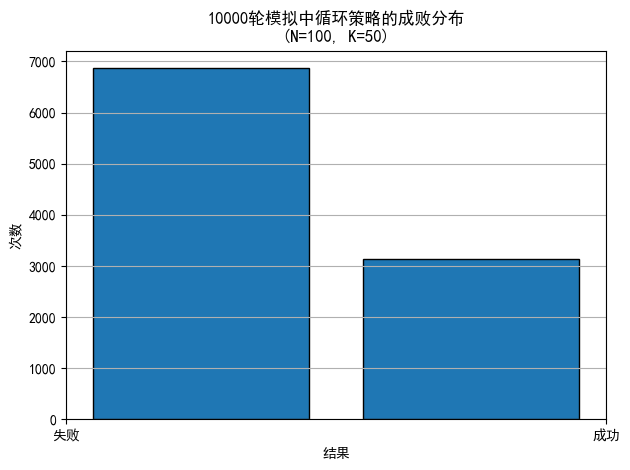

最终时间为：
1.3004560470581055


In [16]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# 设置中文字体与负号显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用于图表的中文显示
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

class PrisonersProblemSimulator:
    def __init__(self, n=100, k=50, t=10000):
        self.n = n  # 囚犯数量
        self.k = k  # 每名囚犯允许打开的盒子数量
        self.t = t  # 模拟轮次
        self.success_random = 0  # 随机策略成功次数
        self.success_cycle = 0   # 循环策略成功次数
        self.cycle_success_distribution = []  # 每轮循环策略的成败分布

    def simulate(self):
        """
        进行 T 轮模拟实验，每轮生成一个随机盒子排列，执行两种策略，统计结果。
        """
        for _ in range(self.t):
            boxes = list(range(self.n))  # 盒子中放入囚犯编号
            random.shuffle(boxes)        # 随机打乱

            # 策略 1：随机搜索
            if self._random_strategy(boxes):
                self.success_random += 1

            # 策略 2：循环策略
            cycle_success = self._cycle_strategy(boxes)
            if cycle_success:
                self.success_cycle += 1
                self.cycle_success_distribution.append(1)
            else:
                self.cycle_success_distribution.append(0)

    def _random_strategy(self, boxes):
        """
        每个囚犯随机选择 K 个盒子，检查是否能找到自己的编号。
        """
        for prisoner in range(self.n):
            choices = random.sample(range(self.n), self.k)
            if prisoner not in [boxes[c] for c in choices]:
                return False  # 某个囚犯失败则全体失败
        return True

    def _cycle_strategy(self, boxes):
        """
        每个囚犯从以自己编号开始查找，依次跳转最多 K 次。
        """
        for prisoner in range(self.n):
            current = prisoner
            for _ in range(self.k):
                if boxes[current] == prisoner:
                    break  # 找到自己编号
                current = boxes[current]  # 跳转到编号对应的新盒子
            else:
                return False  # 超过 K 次未找到
        return True

    def report(self):
        """
        输出两种策略的成功率，并绘制循环策略的成功/失败分布图。
        """
        rate_random = self.success_random / self.t
        rate_cycle = self.success_cycle / self.t

        df = pd.DataFrame({
            "策略": ["随机策略", "循环策略"],
            "成功率": [f"{rate_random:.2%}", f"{rate_cycle:.2%}"]
        })

        print("\n策略成功率对比：")
        print(df.to_string(index=False))

        # 成败分布图
        plt.hist(self.cycle_success_distribution, bins=2, edgecolor='black', rwidth=0.8)
        plt.xticks([0, 1], ['失败', '成功'])
        plt.title(f'{self.t}轮模拟中循环策略的成败分布\n(N={self.n}, K={self.k})')
        plt.xlabel('结果')
        plt.ylabel('次数')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # 之后要用到的
    @staticmethod
    def estimate_theoretical_success_rate(n=100, k=50, trials=100000):
        """
        估计理论最优策略（循环策略）的成功概率
        原理：在一个随机排列中，如果所有循环长度 <= k，则本轮实验成功
        """
        success_count = 0  # 成功的次数计数器
    
        for _ in range(trials):
            visited = [False] * n  # 避免重复计算
            perm = list(range(n))  # 初始排列为0到n-1
            random.shuffle(perm)   # 模拟盒子编号
    
            max_cycle_len = 0  # 当前排列中最大循环长度
    
            for i in range(n):
                if not visited[i]:  # 如果还未被访问，则从该点开始找循环
                    cnt = 0  # 当前循环长度计数
                    j = i
                    while not visited[j]:
                        visited[j] = True  # 标记为访问
                        j = perm[j]       # 跳转到下一个盒子的编号
                        cnt += 1
                    max_cycle_len = max(max_cycle_len, cnt)  # 更新最大循环长度
    
                    # 剪枝优化：如果某个循环长度已经大于K，本次失败，退出循环
                    if max_cycle_len > k:
                        break
    
            # 如果最大循环长度小于等于K，则记录为一次成功
            if max_cycle_len <= k:
                success_count += 1
    
        return success_count / trials  # 返回成功的比例


def main():
    try:
        # 用户输入（可选），若为空则使用默认值
        n = input("请输入囚犯总数 N（默认100直接点选OK）：").strip()
        k = input("请输入每人尝试次数 K（默认50直接点选OK）：").strip()
        t = input("请输入模拟轮数 T（默认10000直接点选OK）：").strip()

        n = int(n) if n else 100
        k = int(k) if k else 50
        t = int(t) if t else 10000

    except ValueError:
        print("输入格式错误，使用默认参数 N=100, K=50, T=10000。")
        n, k, t = 100, 50, 10000

    # 创建模拟器并运行
    start = time.time()
    simulator = PrisonersProblemSimulator(n, k, t)
    simulator.simulate()
    simulator.report()
    duration = time.time() - start
    return duration
if __name__ == '__main__':
    res = main()
    print("最终时间为：")
    print(res)


## 扩展分析
1.  调整N和K的值：
    这里把N和K分别对应转换为 50，25和 30，15重新测试


策略成功率对比：
  策略    成功率
随机策略  0.00%
循环策略 32.72%


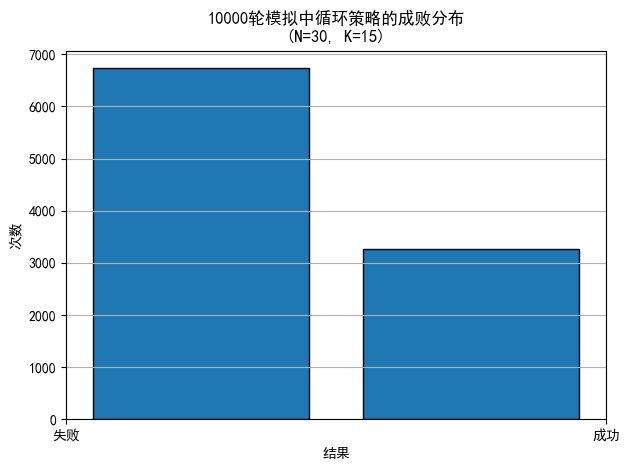

In [7]:
main()# 直接调用即可

2.  绘制趋势图找出最优策略成功率

由于在循环策略中，每个囚犯会沿着一条排列循环移动。一个囚犯成功的前提是他所在的循环长度 ≤ K。如果所有循环长度 ≤ K，则所有囚犯成功
那么问题就转换为：

一个随机排列中，是否所有循环的长度 ≤ K？

**我们通过仿真方式统计最大循环长度是否 ≤ K，次数足够时即可逼近真实理论成功率**

在原先的类中添加方法：

In [ ]:
def estimate_theoretical_success_rate(n=100, k=50, trials=100000):
    """
    估计理论最优策略（循环策略）的成功概率
    原理：在一个随机排列中，如果所有循环长度 <= k，则本轮实验成功
    """
    success_count = 0  # 成功的次数计数器

    for _ in range(trials):
        visited = [False] * n  # 避免重复计算
        perm = list(range(n))  # 初始排列为0到n-1
        random.shuffle(perm)   # 模拟盒子编号

        max_cycle_len = 0  # 当前排列中最大循环长度

        for i in range(n):
            if not visited[i]:  # 如果还未被访问，则从该点开始找循环
                cnt = 0  # 当前循环长度计数
                j = i
                while not visited[j]:
                    visited[j] = True  # 标记为访问
                    j = perm[j]       # 跳转到下一个盒子的编号
                    cnt += 1
                max_cycle_len = max(max_cycle_len, cnt)  # 更新最大循环长度

                # 剪枝优化：如果某个循环长度已经大于K，本次失败，退出循环
                if max_cycle_len > k:
                    break

        # 如果最大循环长度小于等于K，则记录为一次成功
        if max_cycle_len <= k:
            success_count += 1

    return success_count / trials  # 返回成功的比例


具体执行：

In [2]:
simulator = PrisonersProblemSimulator(100, 50, 10000)
theoretical_rate = simulator.estimate_theoretical_success_rate(100, 50, 100000)
print(f"理论成功率估计（基于排列循环模拟）：{theoretical_rate:.2%}")

理论成功率估计（基于排列循环模拟）：30.96%


实际模拟成功率 ≈ 理论成功率，说明代码已成功实现仿真。同时理论值是大数定律下的“平均期望值”，而实际模拟值也收敛到了类似的结果，说明模拟轮数已基本足够，不再剧烈波动，总之循环策略的数学模型是准确的，模拟程序也是可信的。

##  优化策略
本实验通过判断最大循环长度是否 ≤ K进行了相应的剪枝，从而达到优化的目的
同时使用NumPy数组代替list，在默认情况下重构计算，得到以下结果：

In [15]:
import numpy as np
import random
import time

def estimate_success_rate_numpy(n=100, k=50, t=10000):
    success_count = 0
    for _ in range(t):
        # 使用 numpy 数组代替 list
        perm = np.arange(n)
        np.random.shuffle(perm)
        visited = np.zeros(n, dtype=bool)

        max_cycle_len = 0

        for i in range(n):
            if not visited[i]:
                cnt = 0
                j = i
                while not visited[j]:
                    visited[j] = True
                    j = perm[j]
                    cnt += 1
                    if cnt > k:
                        # 剪枝：一旦超过 k，直接判定失败，跳出外层循环
                        max_cycle_len = cnt
                        break
                if cnt > k:
                    break
                max_cycle_len = max(max_cycle_len, cnt)
        if max_cycle_len <= k:
            success_count += 1
    return success_count / t

# 比较原始版本和 numpy 优化版本的运行时间
def benchmark():
    start = time.time()
    rate_numpy = estimate_success_rate_numpy()
    duration = time.time() - start
    return rate_numpy, duration

rate, cost = benchmark()
print("优化后概率为：")
print(rate)
print("优化后时间为：")
print(cost)

优化后概率为：
0.3076
优化后时间为：
0.1743617057800293
